# Image denoising with autoencoder

In [1]:
import sys

sys.path.append("../")

import keras

import matplotlib.pyplot as plt
import numpy as np

from autoencoder import Autoencoder

2025-01-09 21:10:14.395695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736467814.408226   14077 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736467814.411974   14077 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 21:10:14.426819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype(float) / 255.0
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

x_test = x_test.astype(float) / 255.0
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

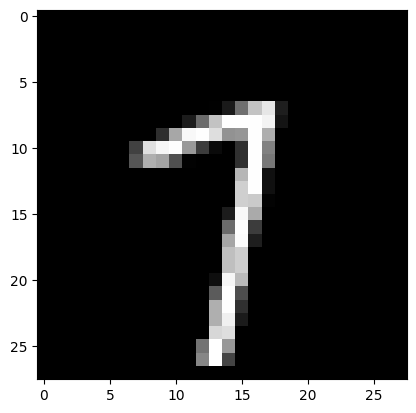

In [4]:
i = 42
plt.imshow(x_train[i], cmap="gray")
plt.show()

In [5]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)

x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

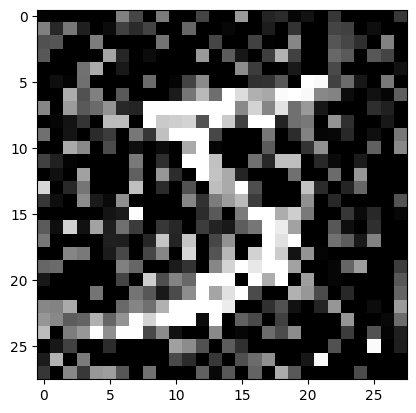

In [6]:
plt.imshow(x_train_noisy[0], cmap="gray")
plt.show()

In [7]:
ae_nn = Autoencoder(input_shape=x_train.shape[1:],
                    filters=[28,14],
                    kernel_size=3,
                    strides=(2,2), 
                    padding="same",
                    activation="relu",
                    use_bias=True)

I0000 00:00:1736467820.946055   14077 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12640 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9


In [8]:
ae_nn.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 14)       │         3,542 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 1)        │           127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949 (15.43 KB)

 Trainable params: 3,949 (15.43 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
ae_nn.decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 14)     │           140 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 28)     │         3,556 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 1)      │           253 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949 (15.43 KB)

 Trainable params: 3,949 (15.43 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ae_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

In [11]:
callback_history = ae_nn.fit(x=x_train_noisy, y=x_train, epochs=20)

Epoch 1/20


I0000 00:00:1736467827.908211   14170 service.cc:148] XLA service 0x77b6ec00bfb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736467827.908232   14170 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-09 21:10:27.929959: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736467828.039157   14170 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-09 21:10:28.643671: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 136/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0714

I0000 00:00:1736467829.022270   14170 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0342
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0200
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0190
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0185
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0182
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0179
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0176
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0174
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0170
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0169
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0168
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0167
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0166
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0164
Epoch 15/20
1875/1875 ━━━━━━━━━━━━━━━━━━

In [12]:
latent_space = ae_nn.encoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


In [13]:
decoded = ae_nn.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


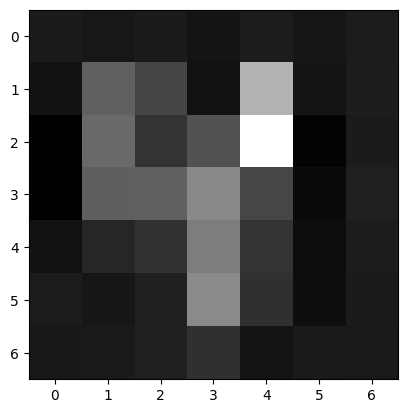

In [14]:
i = 42
plt.imshow(latent_space[i], cmap="gray")
plt.show()

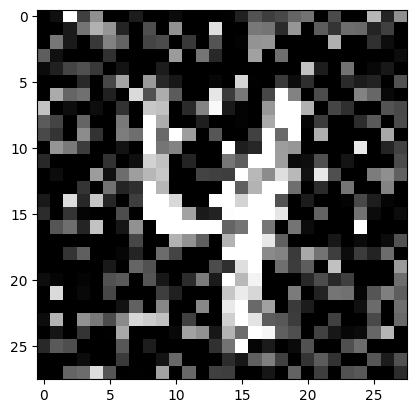

In [15]:
plt.imshow(x_test_noisy[i], cmap="gray")
plt.show()

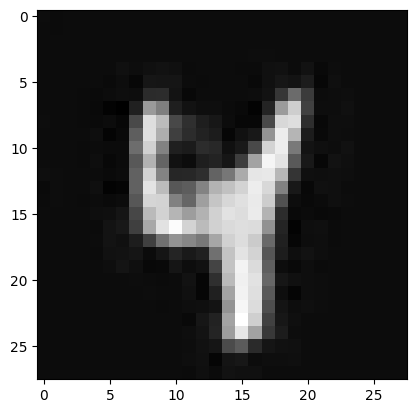

In [16]:
plt.imshow(decoded[i], cmap="gray")
plt.show()

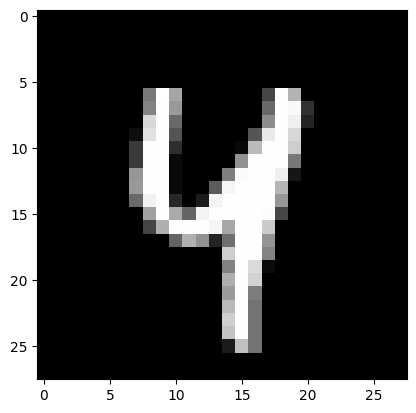

In [17]:
plt.imshow(x_test[i], cmap="gray")
plt.show()